In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Import the Test and Train dataset

In [ ]:
ftest=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Food_Test.csv')
ftrain=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Food_Train.csv')

Identification of data types:

In [ ]:
ftest.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [ ]:
ftrain.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Size of the dataset:

In [ ]:
ftest.shape

(4231, 8)

In [ ]:
ftrain.shape

(12690, 9)

Statistical Summary of Numeric Variables:

In [ ]:
ftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [ ]:
ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Data pre-processing

In [ ]:
# merging ftrain and ftest datasets
df = ftrain.append(ftest,ignore_index=True)

In [ ]:
df = df[['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST']]

In [ ]:
df['RATING'] = df['RATING'].str.replace('NEW', '1')
df['RATING'] = df['RATING'].str.replace('-', '1').astype(float)
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)
df['COST'] = df['COST'].astype(float)

Non-Graphical Univariate Analysis:

In [ ]:
#To get the count of unique values:
#Determining the types of unique cuisines in the datset

ftrain['CUISINES'].value_counts()

South Indian                                         532
North Indian                                         526
North Indian, Chinese                                501
Fast Food                                            286
Chinese                                              167
                                                    ... 
Continental, American, North Indian                    1
South Indian, Fast Food, North Indian, Chinese         1
Chinese, Healthy Food, North Indian, South Indian      1
Cafe, Italian, Chinese, Mexican                        1
Chinese, Japanese, Thai, Asian, Sushi                  1
Name: CUISINES, Length: 4155, dtype: int64

In [ ]:
#Finding null/missing values

print('Missing Values in Train set:',ftrain.isnull().sum(axis = 0))

Missing Values in Train set: TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64


In [ ]:
print('Missing Values in Test set:',ftest.isnull().sum(axis = 0))

Missing Values in Test set: TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


In [ ]:
#Removing the missing or the null values from the dataset

ftrain.CITY.fillna(value=27,inplace=True)
ftrain.LOCALITY.fillna(value=27,inplace=True)
ftrain.RATING.fillna(value=27,inplace=True)
ftrain.VOTES.fillna(value=27,inplace=True)
ftest.CITY.fillna(value=27,inplace=True)
ftest.LOCALITY.fillna(value=27,inplace=True)
ftest.RATING.fillna(value=27,inplace=True)
ftest.VOTES.fillna(value=27,inplace=True)

In [ ]:
#Check if the null values are removed

print('Missing Values in Train set:',ftrain.isnull().sum(axis = 0))

Missing Values in Train set: TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64


In [ ]:
print('Missing Values in Test set:',ftest.isnull().sum(axis = 0))

Missing Values in Test set: TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64


In [ ]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0


In [ ]:
#Clculating the average Ratings City-Wise

rating_city_mean = df.groupby(['CITY'], axis=0).agg({'RATING': 'mean'})
rating_city_mean

,RATING
CITY,
10th avenue,3.600000
1st Stage,3.766667
1st Tavarekere,3.400000
3rd Street,4.300000
5th Main Teachers Colony Koramangala Block 1 Bangalore 560034,4.100000
...,...
opp gurudwara Shakurpur,3.800000
opp mukteshwar ashram powai,4.700000
opposite to western side of ITPL Service gate,3.600000


In [ ]:
#Calculate the mean of the Ratings Locality-Wise
rating_localtiy_mean = df.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'})
rating_localtiy_mean

,RATING
LOCALITY,
(Main Market) Mayur Vihar Phase 2,4.0
(ground floor of Sunrise Chambers),4.2
1 st Cross street,3.6
1-7-172/1 Ecil Opposite,3.8
100 Ft Road,3.0
...,...
seawoods grand central mall,3.9
sector 42,1.0
sholinganallur,2.9


Graphical Univariate Analysis:

<Figure size 936x936 with 0 Axes>

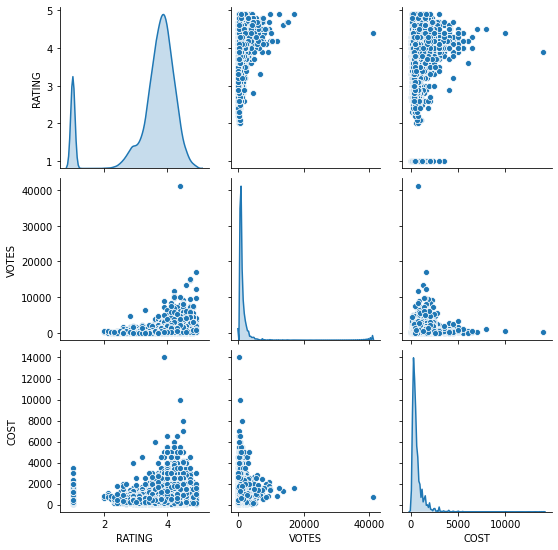

In [ ]:
plt.figure(figsize=[13,13])
sns.pairplot(df,diag_kind='kde')

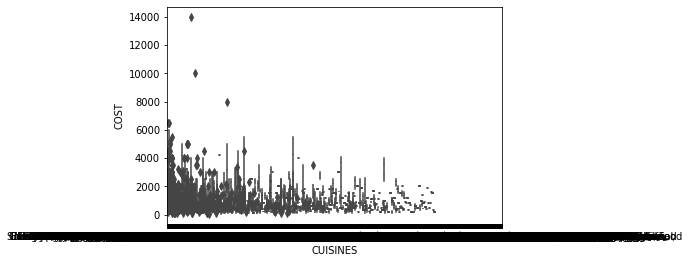

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=df['CUISINES'],y=df['COST'])

In [ ]:
#checking for correaltion between variables

df.corr()

,RATING,VOTES,COST
RATING,1.000000,0.349979,0.258957
VOTES,0.349979,1.000000,0.245256
COST,0.258957,0.245256,1.000000


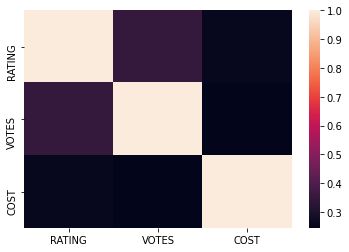

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(df.corr())

In [ ]:
#Checking the skewness

df.skew()

RATING    -1.867870
VOTES     12.385436
COST       3.978801
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['RATING'] = le.fit_transform(df['RATING'])
df['VOTES'] = le.fit_transform(df['VOTES'])
df['COST'] = le.fit_transform(df['COST'])
df.head(5)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,17,46,36
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,23,27,43
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,19,218,28
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,22,21,28
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,19,162,14


In [ ]:
#dummifying data required for spliting the data

df = pd.get_dummies(df)
df.head(5)

,RATING,VOTES,COST,TITLE_BAKERY,"TITLE_BAKERY,BEVERAGE SHOP","TITLE_BAKERY,CAFÉ","TITLE_BAKERY,CASUAL DINING","TITLE_BAKERY,CONFECTIONERY","TITLE_BAKERY,DESSERT PARLOR","TITLE_BAKERY,FOOD COURT","TITLE_BAKERY,QUICK BITES","TITLE_BAKERY,SWEET SHOP",TITLE_BAR,"TITLE_BAR,CAFÉ","TITLE_BAR,CASUAL DINING","TITLE_BAR,CLUB","TITLE_BAR,FINE DINING","TITLE_BAR,LOUNGE","TITLE_BAR,MICROBREWERY","TITLE_BAR,PUB",TITLE_BEVERAGE SHOP,"TITLE_BEVERAGE SHOP,CAFÉ","TITLE_BEVERAGE SHOP,CASUAL DINING","TITLE_BEVERAGE SHOP,DESSERT PARLOR","TITLE_BEVERAGE SHOP,FOOD COURT","TITLE_BEVERAGE SHOP,QUICK BITES",TITLE_BHOJANALYA,TITLE_CAFÉ,"TITLE_CAFÉ,BAKERY","TITLE_CAFÉ,BAR","TITLE_CAFÉ,BEVERAGE SHOP","TITLE_CAFÉ,CASUAL DINING","TITLE_CAFÉ,DESSERT PARLOR","TITLE_CAFÉ,FINE DINING","TITLE_CAFÉ,FOOD COURT","TITLE_CAFÉ,LOUNGE","TITLE_CAFÉ,QUICK BITES",TITLE_CASUAL DINING,"TITLE_CASUAL DINING,BAKERY","TITLE_CASUAL DINING,BAR",...,LOCALITY_West Saidapet,LOCALITY_West Tambaram,LOCALITY_Whitefield,LOCALITY_Willingdon Island,LOCALITY_Wilson Garden,LOCALITY_Wipro Gate,LOCALITY_Worli,LOCALITY_X Roads Besides Famous Tailors,LOCALITY_YMCA Junction. Chittoor Road,LOCALITY_Yapral,LOCALITY_Yelahanka,LOCALITY_Yelahanka New Town,LOCALITY_Yeshwantpur,LOCALITY_Yousufguda,LOCALITY_Yousufguda Main Road,LOCALITY_Yusuf Sarai,LOCALITY_Zakir Nagar,LOCALITY_Zehra Nagar,LOCALITY_hsr layout,LOCALITY_in front of Rajiv chowk metro gate no -5,LOCALITY_international Airport,LOCALITY_kadubeesanahalli,LOCALITY_kakkanad,LOCALITY_kphb 4th phase,LOCALITY_kukatpally,LOCALITY_landmark Niranjan central apartment,LOCALITY_lane besides to King’s Burger. Next to nellore mess,LOCALITY_madhapur,LOCALITY_near Andhra Prabha office,LOCALITY_near swarn nagri,LOCALITY_nizampet,LOCALITY_nungambakkam,LOCALITY_perungudi,LOCALITY_phase 3,LOCALITY_rajendra nagar,LOCALITY_seawoods grand central mall,LOCALITY_sector 42,LOCALITY_sholinganallur,LOCALITY_shop 7 shikrupa socity,LOCALITY_shop no. 3 Sector 22
0,17,46,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,23,27,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19,218,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,21,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19,162,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#spliting the data

X = df.drop(labels=['COST'], axis=1)
y = df['COST'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Building the model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
#max_r_score=0
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =0,test_size=0.20)
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
r2_scr=r2_score(y_test,y_pred)
  #if r2_scr>max_r_score:
   # max_r_score=r2_scr
    #final_r_state=r_state 

In [ ]:
print("Max r2 score corresponding to is",r2_scr)

Max r2 score corresponding to is -0.4304675646655043


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 Score: ", r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  -0.4304675646655043
RMSE: 1314.3606521722033


In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(lreg,'restaurant_cost.pkl')

['restaurant_cost.pkl']